In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0) #从tensorflow自带数据集读取mnist并存储到当前路径

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


绘制一幅手写字的图片，图片size为28\*28

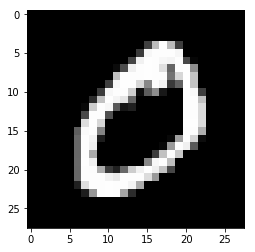

In [12]:
img = mnist.train.images[1] # np.array
plt.imshow(img.reshape(28,28),cmap='Greys_r') # 色卡选择灰度

首先将28\*28维的array flatten成1\*784的vectors. 数据集中的图片矩阵已做过标准化处理，数值均在0-1之间。我们将通过一个**ReLU hidden layer**搭建一个简单的自编码生成器. ReLu这一层主要用于压缩数据。自编码中的encode部分是输入层和隐藏层，而decode 部分则是隐藏层和输出层，由于数据经过标准化且在0-1范围内，所以在输出层加入一个sigmoid activation来匹配输入值。

Exercise: Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, tf.layers. For instance, you would use **tf.layers.dense(inputs, units, activation=tf.nn.relu)** to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this **tf.nn.sigmoid_cross_entropy_with_logits** (documentation). You should note that **tf.nn.sigmoid_cross_entropy_with_logits** takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [17]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,shape=[None,image_size],name='inputs')
targets_ = tf.placeholder(tf.float32,shape=[None,image_size],name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits,name='output') 

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = targets_,logits = logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [18]:
# Create the session
sess = tf.Session()

这里并不关心交叉验证，只是不断调试loss的大小。

以下采用批处理训练，利用 mnist.train.next_batch(batch_size)可以得到元组(images,labels)，我们不关心这里的labels 而仅需要images。

In [19]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer()) #初始化变量
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}# 输入和目标都是images
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed) #利用损失函数和优化函数训练

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6952
Epoch: 1/20... Training loss: 0.6922
Epoch: 1/20... Training loss: 0.6895
Epoch: 1/20... Training loss: 0.6862
Epoch: 1/20... Training loss: 0.6825
Epoch: 1/20... Training loss: 0.6780
Epoch: 1/20... Training loss: 0.6726
Epoch: 1/20... Training loss: 0.6650
Epoch: 1/20... Training loss: 0.6565
Epoch: 1/20... Training loss: 0.6464
Epoch: 1/20... Training loss: 0.6369
Epoch: 1/20... Training loss: 0.6227
Epoch: 1/20... Training loss: 0.6109
Epoch: 1/20... Training loss: 0.5962
Epoch: 1/20... Training loss: 0.5800
Epoch: 1/20... Training loss: 0.5654
Epoch: 1/20... Training loss: 0.5477
Epoch: 1/20... Training loss: 0.5280
Epoch: 1/20... Training loss: 0.5105
Epoch: 1/20... Training loss: 0.4929
Epoch: 1/20... Training loss: 0.4757
Epoch: 1/20... Training loss: 0.4567
Epoch: 1/20... Training loss: 0.4347
Epoch: 1/20... Training loss: 0.4295
Epoch: 1/20... Training loss: 0.4065
Epoch: 1/20... Training loss: 0.3979
Epoch: 1/20... Training loss: 0.3873
E

Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1964
Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1825
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1838
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1818
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1808
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1783
Epoch: 1/20... Training loss: 0.1842
E

Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1573
E

Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1339
E

Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1184
E

Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1168
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1170
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1160
E

Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1112
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1064
E

Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1080
E

Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.0940
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1012
E

Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0984
E

Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.1019
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0950
E

Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.1018
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.1009
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0900
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0993
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0895
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0883
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0884
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0887
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0893
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0895
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0886
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20

Checking out the results

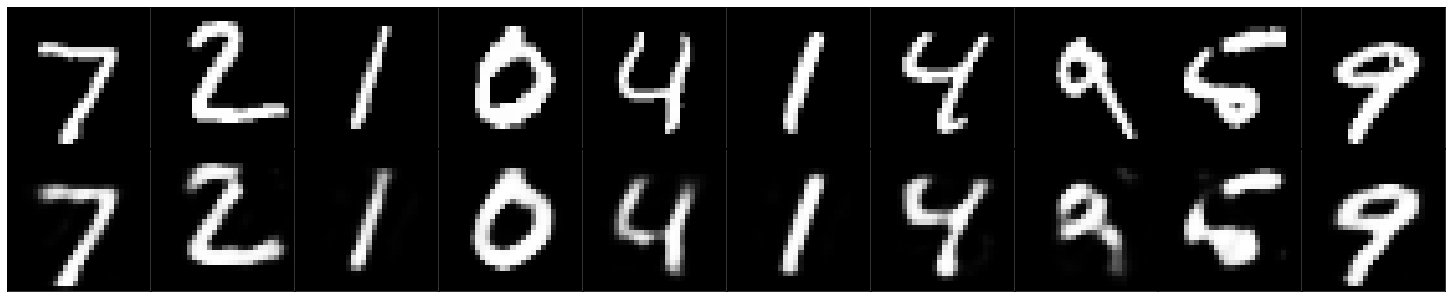

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)